<a href="https://colab.research.google.com/github/lucasoliveira13/udemy_courses/blob/main/1_number_reading_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)

(60000, 28, 28)


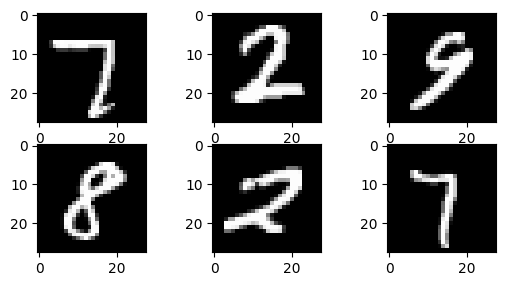

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

for i in range(0,6):
  random_num = np.random.randint(0,len(x_train))
  img = x_train[random_num]
  plt.subplot(331+i)
  plt.imshow(img, cmap = plt.get_cmap('gray'))
plt.show()

In [ ]:
img_rows = x_train[0].shape[0]
img_columns = x_train[0].shape[0]

x_train = x_train.reshape(x_train.shape[0], img_rows, img_columns, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_columns, 1)

input_shape = (img_rows, img_columns, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [ ]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 696.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=351b200ab36a84028966db1afb8322b9ae105e18c35b0c04fb166e7fda041f40
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
from keras.utils import to_categorical


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('Number of classes: ', y_test.shape[1])

num_classes = y_test.shape[1]
num_pixel = x_train.shape[1] * x_train.shape[2]

Number of classes:  10


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD

model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [ ]:
batch_size = 32
epochs = 10

history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data = (x_test,y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
1875/1875 [==============================] - 149s 80ms/step - loss: 0.2926 - accuracy: 0.9123 - val_loss: 0.1477 - val_accuracy: 0.9540
Epoch 2/10
1875/1875 [==============================] - 140s 75ms/step - loss: 0.2228 - accuracy: 0.9340 - val_loss: 0.1080 - val_accuracy: 0.9663
Epoch 3/10
1875/1875 [==============================] - 145s 77ms/step - loss: 0.1739 - accuracy: 0.9475 - val_loss: 0.0838 - val_accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 140s 75ms/step - loss: 0.1431 - accuracy: 0.9576 - val_loss: 0.0661 - val_accuracy: 0.9784
Epoch 5/10
1875/1875 [==============================] - 141s 75ms/step - loss: 0.1246 - accuracy: 0.9632 - val_loss: 0.0613 - val_accuracy: 0.9810
Epoch 6/10
1875/1875 [==============================] - 140s 75ms/step - loss: 0.1087 - accuracy: 0.9676 - val_loss: 0.0527 - val_accuracy: 0.9829
Epoch 7/10
1875/1875 [==============================] - 162s 86ms/step - loss: 0.0973 - accuracy: 0.9711 - val_loss: 0

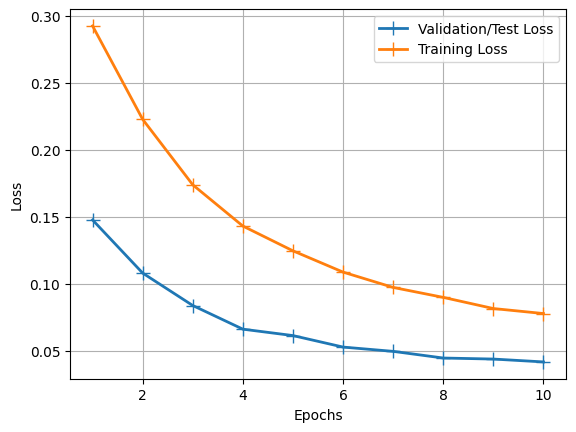

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')
plt.setp(line1, linewidth=2.0, marker='+', markersize = 10.0)
plt.setp(line2, linewidth=2.0, marker='+', markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

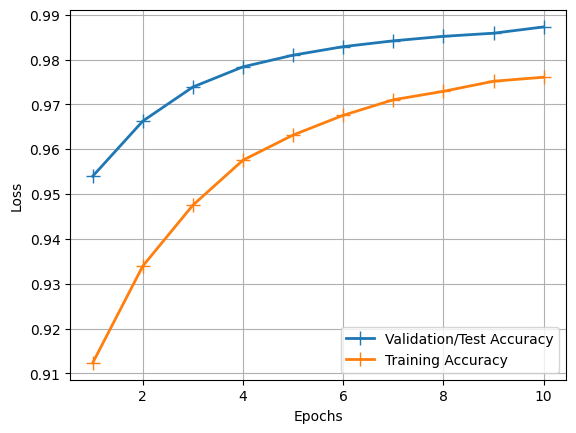

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

line1 = plt.plot(epochs, val_acc, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc, label = 'Training Accuracy')
plt.setp(line1, linewidth=2.0, marker='+', markersize = 10.0)
plt.setp(line2, linewidth=2.0, marker='+', markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
model.save("mnist_simple_cnn_10_epochs.h5")
print('Model saved successfully!')

Model saved successfully!


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model
classifier = load_model("mnist_simple_cnn_10_epochs.h5")

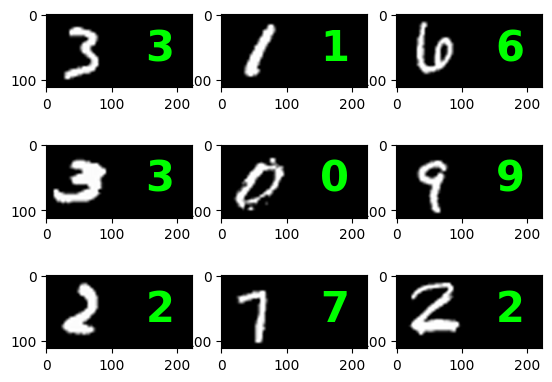

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def draw_test(name, pred, input_im,i):
  BLACK = [0,0,0]
  expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0], cv2.BORDER_CONSTANT, value=BLACK)
  expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
  plt.subplot(331+i)
  plt.imshow(cv2.cvtColor(expanded_image, cv2.COLOR_BGR2RGB))
  plt.text(152, 70, str(pred), fontsize=30, color='lime', fontweight='bold')

for i in range(0, 9):
  rand = np.random.randint(0,len(x_test))
  input_im = x_test[rand]

  imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
  input_im = input_im.reshape(1,28,28,1)

  probs = classifier.predict(input_im, 1, verbose=0)[0]
  pred_class = np.argmax(probs)
  res = str(pred_class)

  draw_test("Prediction", res, imageL,i)

plt.show()